# Answering business questions using SQL and Python

#### Objectives:

    The aim of this project is to read a database using SQLITE library in Python and plot information gathered from it.    The database was provided by dataquest.io, the project being the first in a series of SQL tutorials using Python.


##### Resources used:

**Anaconda distribution** - *Jupyter Notebook v 5.7.8*, *Python 3.7.3*

In [1]:
#importing the libraries

import sqlite3
import pandas as pd
%matplotlib inline


First, we will create some helper functions, because of the same code we need to write each time we try to run an SQL query using SQLITE3.


In [2]:
def run_query(q):    
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [3]:
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [8]:
def show_tables():
    return run_query("SELECT name from sqlite_master where type='table'")
    
    

Testing the *show tables* function and getting an overview of the tables present in the database.

In [23]:
show_tables()

,name
0,album
1,artist
2,customer
3,employee
4,genre
5,invoice
6,invoice_line
7,media_type
8,playlist
9,playlist_track


First question we will answer  - the no. of tracks and their overall percentage sold from the entire songlist in USA, grouped by gender.

In [21]:
q = """select g.name genre_name, 
            count(*) tracks_sold,
            CAST( count(*) as FLOAT) *100 / CAST( 
                                            (Select count(*) from track t 
                                                             join invoice_line il on t.track_id = il.track_id 
                                                             join invoice i on i.invoice_id = il.invoice_id 
                                                             where i.billing_country='USA') as FLOAT) percentage 
            from track t join invoice_line il on t.track_id = il.track_id 
            join invoice i on il.invoice_id = i.invoice_id 
            join genre g on g.genre_id = t.genre_id 
            where i.billing_country='USA' group by 1 order by percentage desc;"""

In [22]:
run_query(q)

,genre_name,tracks_sold,percentage
0,Rock,561,53.377735
1,Alternative & Punk,130,12.369172
2,Metal,124,11.798287
3,R&B/Soul,53,5.042816
4,Blues,36,3.425309
5,Alternative,35,3.330162
6,Latin,22,2.093245
7,Pop,22,2.093245
8,Hip Hop/Rap,20,1.902950
9,Jazz,14,1.332065


The top 3 most sold genres are rock subgenres - the main genre, *Rock*, leading by far, holding more than 50% of the total sales.
We will plot the result of the table below:

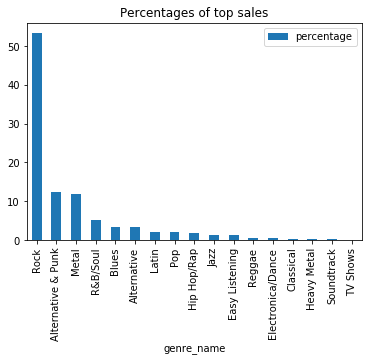

In [24]:
run_query(q).plot(x= "genre_name", y="percentage",kind="bar",title="Percentages of top sales")

# not much editing possible with pandas.plot method, maybe i should try with matplotlib

In [9]:
c = "DROP VIEW t5countries"
run_command(c)
c = '''
CREATE VIEW t5countries AS
     SELECT
         c.country,
         count(distinct c.customer_id) customer_count,
         SUM(i.total) total_sales,
         AVG(i.total)/count(c.customer_id) avg_sales,
         AVG(i.total) avg_value
     FROM customer c JOIN invoice i on c.customer_id = i.customer_id
     GROUP by 1
     ORDER by 2 DESC;
'''
run_command(c)
q = '''SELECT 
        CASE WHEN customer_count = 1 THEN "Other"
            Else country
        END country,
         customer_count,
         total_sales,
          avg_sales,
         avg_value FROM ( SELECT t5countries.*, CASE WHEN t5countries.customer_count = 1 THEN 1 ELSE 0 END AS SORT FROM t5countries ) GROUP BY 1 ORDER BY 2 DESC '''
tmp = run_query(q)
run_query(q)

,country,customer_count,total_sales,avg_sales,avg_value
0,USA,13,1040.49,0.060631,7.942672
1,Canada,8,535.59,0.092727,7.047237
2,Brazil,5,427.68,0.114937,7.011148
3,France,5,389.07,0.155628,7.781400
4,Germany,4,334.62,0.199060,8.161463
5,United Kingdom,3,245.52,0.313163,8.768571
6,Czech Republic,2,273.24,0.303600,9.108000
7,India,2,183.15,0.415306,8.721429
8,Portugal,2,185.13,0.220131,6.383793
9,Other,1,75.24,0.752400,7.524000


# not quite done, but i'll persevere
- plots to be done


In [10]:
from matplotlib import pyplot as plt

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
tmp[["country","customer_count"].plot(ax=axes[0,0]); axes[0,0].set_title('A')

SyntaxError: invalid syntax (<ipython-input-14-5b2dcd088112>, line 2)